In [31]:
# Import the packages
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [32]:
# Read the data file
df = pd.read_csv('./USD_LKR_Dataset.csv')
df.head()

,Date,Price,Open,High,Low,Change %
0,12/26/1979,15.552,15.552,15.552,15.552,0.00%
1,12/27/1979,15.552,15.552,15.552,15.552,0.00%
2,12/28/1979,15.552,15.552,15.552,15.552,0.00%
3,12/31/1979,15.552,15.552,15.552,15.552,0.00%
4,1/2/1980,15.552,15.552,15.552,15.552,0.00%


In [33]:
# Change the Index and Modify the table
df.index = pd.to_datetime(df['Date'])

df.drop(['Date'], inplace=True, axis='columns')

df = df[['Open']]
df.head()

,Open
Date,
1979-12-26,15.552
1979-12-27,15.552
1979-12-28,15.552
1979-12-31,15.552
1980-01-02,15.552


In [34]:
# Refer basic info of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10372 entries, 1979-12-26 to 2021-11-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    10372 non-null  float64
dtypes: float64(1)
memory usage: 162.1 KB


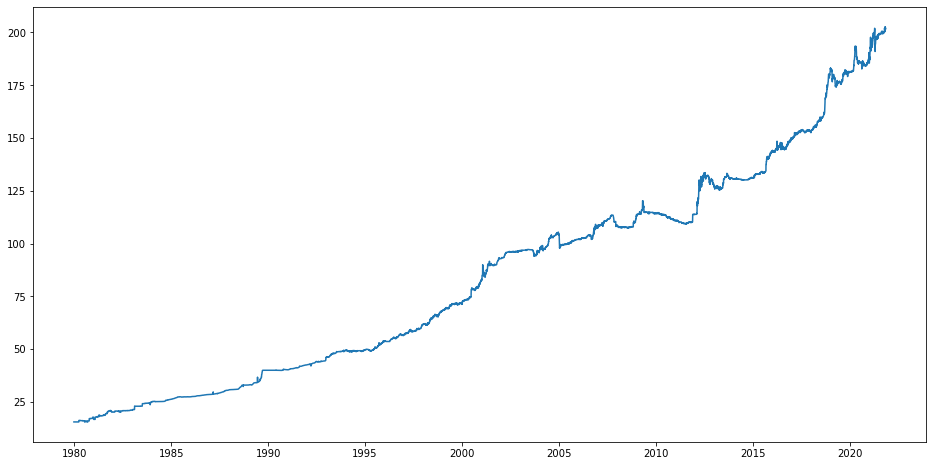

In [35]:
# Check the data distribution
plt.figure(figsize=(16,8))
plt.plot(df['Open'], label='Open Price history')

In [36]:
import pandas_ta

# Adding EMA to the data set
df.ta.ema(close='Open', length=10, append=True)

Date
1979-12-26           NaN
1979-12-27           NaN
1979-12-28           NaN
1979-12-31           NaN
1980-01-02           NaN
                 ...    
2021-10-28    201.378332
2021-10-29    201.491363
2021-11-01    201.583842
2021-11-02    201.568598
2021-11-03    201.647035
Name: EMA_10, Length: 10372, dtype: float64

In [37]:
# Normalize the Data
df = df[df['EMA_10'].notna()]

df.head()

,Open,EMA_10
Date,,
1980-01-09,15.552,15.552
1980-01-10,15.552,15.552
1980-01-11,15.552,15.552
1980-01-14,15.552,15.552
1980-01-15,15.552,15.552


In [38]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(df[['Open']], df[['EMA_10']], test_size=.2)

In [39]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use model to make predictions
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Results
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.99904263]]
Mean Absolute Error: 0.192987936578188
Coefficient of Determination: 0.9999383075603413
